### Sales Prediction for Big Mart Outlets

* The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 



#### Data Dictionary
* We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.



## Importing Necessary Libraries and Data sets

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv('test_AbJTz2l.csv')
test_copy = pd.read_csv('test_AbJTz2l.csv')
train = pd.read_csv('train_v9rqX0R.csv')

## Understanding the data

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [6]:
train.shape

(8523, 12)

In [7]:
test.shape

(5681, 11)

In [8]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

* Categorical Features:

    * Item_Fat_Content
    * Item_Type
    * Outlet_Identifier
    * Outlet_Size
    * Outlet_Location_Type
    * Outlet_Type

In [10]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

* Both in test and train data we have missing values for Item Weight and Outlet Size

In [12]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## Exploratory Data Analysis

In [14]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

* Here low fat,LF and Low Fat are same. Similarly Regular and reg are same. So changing to 2 unique items Regular and Low fat

In [15]:
train.Item_Fat_Content = train.Item_Fat_Content.replace(to_replace=['low fat', 'LF', 'reg'], value=['Low Fat', 'Low Fat', 'Regular'])

In [16]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [17]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
test.Item_Fat_Content = test.Item_Fat_Content.replace(to_replace=['low fat', 'LF', 'reg'], value=['Low Fat', 'Low Fat', 'Regular'])

In [19]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [20]:
test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

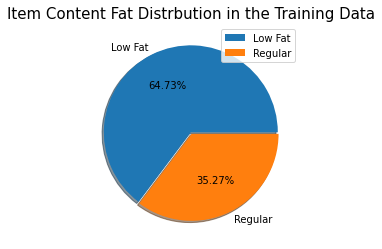

In [21]:
low_fat = train.Item_Fat_Content[train.Item_Fat_Content == 'Low Fat'].count()
reg = train.Item_Fat_Content[train.Item_Fat_Content == 'Regular'].count()
plt.title("Item Content Fat Distrbution in the Training Data",{"fontsize" : 15})
plt.pie([low_fat, reg], labels=['Low Fat', 'Regular'], explode=[0.01,0.01], autopct="%.2f%%",shadow=True)
plt.legend()

plt.show()


* Low fat item is more when compared to regular 

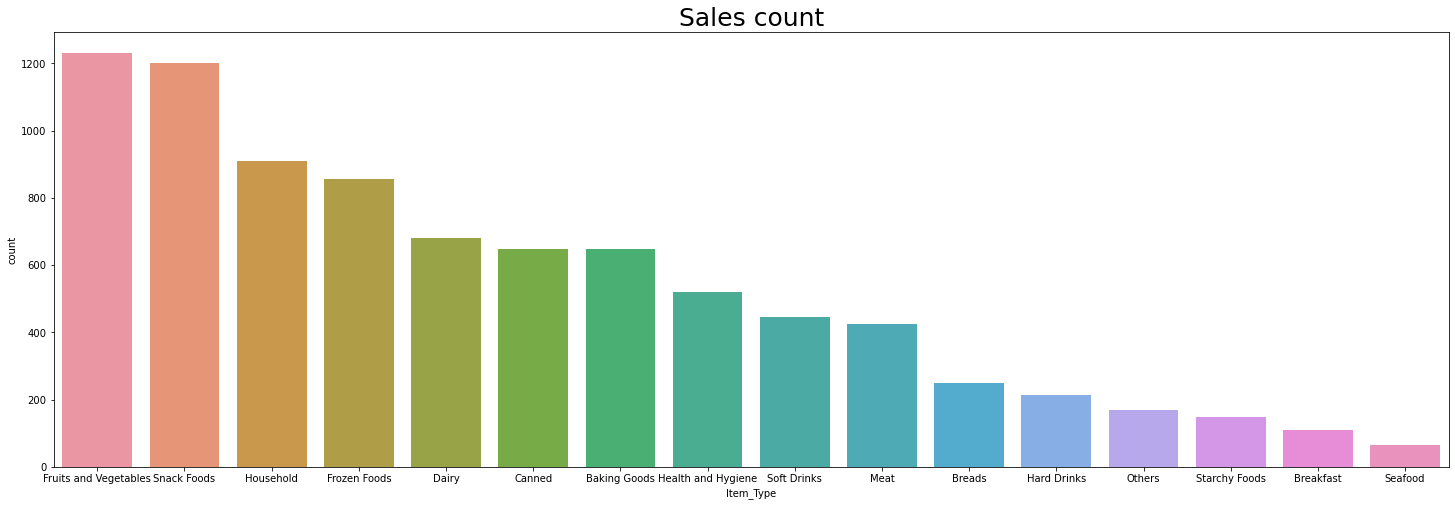

In [22]:
plt.figure(figsize=(25,8))
plt.title("Sales count", {"fontsize" : 25})
order = train.groupby('Item_Type').count().sort_values(by='Item_Outlet_Sales', ascending=False).index
sns.countplot(x='Item_Type', data=train, order=order);

* Fruits and vegetables along with Snacks foods have higher sales when compared to other items

In [23]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

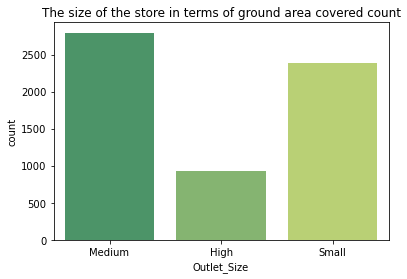

In [24]:
plt.title("The size of the store in terms of ground area covered count")
sns.countplot(x='Outlet_Size', data=train, palette='summer')
plt.show()

* Medium size is majority

In [25]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

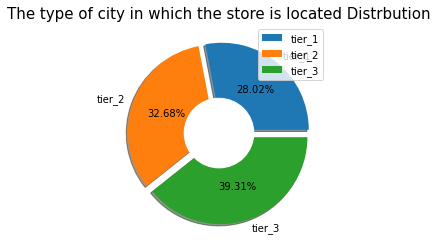

In [26]:
tier_1 = train.Outlet_Location_Type[train.Outlet_Location_Type == 'Tier 1'].count()
tier_2 = train.Outlet_Location_Type[train.Outlet_Location_Type == 'Tier 2'].count()
tier_3 = train.Outlet_Location_Type[train.Outlet_Location_Type == 'Tier 3'].count()
plt.title("The type of city in which the store is located Distrbution",{"fontsize" : 15})
plt.pie([tier_1, tier_2, tier_3], labels=['tier_1', 'tier_2', 'tier_3'], autopct="%.2f%%", shadow=True, explode=[0.05,0.05,0.05])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend()

plt.show()

* Outlets are maximun in tier 3 cities

In [27]:
train.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [28]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

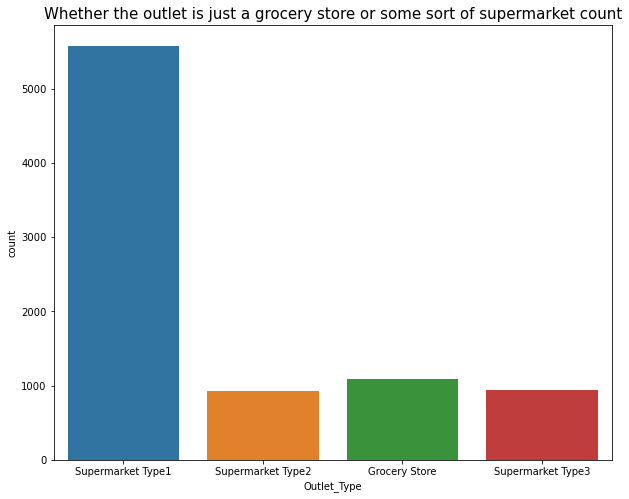

In [29]:
plt.figure(figsize=(10,8))
plt.title("Whether the outlet is just a grocery store or some sort of supermarket count",{"fontsize" : 15})
sns.countplot(x='Outlet_Type', data=train)
plt.show()

* The Outlets are more of Supermarket Type1

In [30]:
columns = train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']]
list(columns.columns)

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

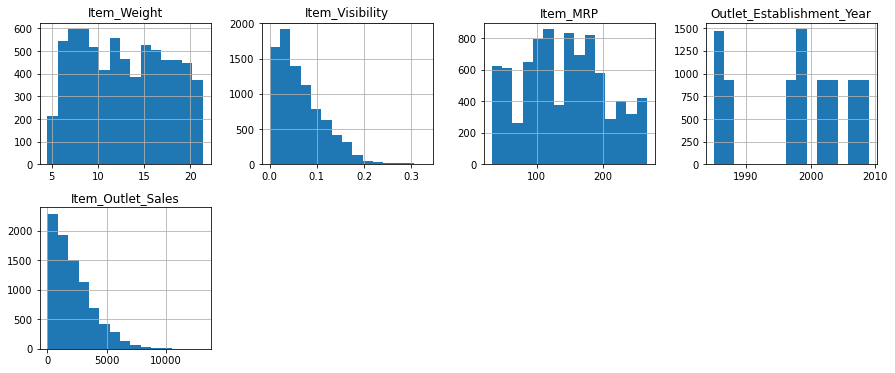

In [31]:
train[list(columns.columns)].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.show()

In [32]:
col_num=train.select_dtypes(include=["int64","float64"]).columns.tolist()
col_num

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

* Item Weight : We can see maximum frequency between 6-9
* Item_Visibility : Maximum frequency between 0.01-.05
* Item_MRP : Price frequency is max between 100-140 & 150-190
* Establishment_year : Most of them are established before 1990
* Sales : Max occurances for sales value 0-2k, few sales can be seen around 9k as well

### Inferences from EDA

* Low fat item is more popular that regular ones
* Selling of more variety of  fruits and vegetables along with Snacks can attract more customers
* Highly priced food items have fewer chances of being sold
 

## Data Preprocessing

### Handling Missing values

In [33]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [34]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

* Filling the missing value of Item_weight with median and Outlet_size with mode

In [35]:
train['Item_Weight'].fillna(train['Item_Weight'].median(),inplace=True)
test['Item_Weight'].fillna(test['Item_Weight'].median(),inplace=True)

In [36]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

In [37]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [38]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Dropping un-important columns

In [39]:
train.drop('Item_Identifier', axis = 1, inplace = True)
train.drop('Outlet_Identifier',axis = 1, inplace = True)
test.drop('Item_Identifier', axis = 1, inplace = True)
test.drop('Outlet_Identifier',axis = 1, inplace = True)

In [40]:
x = train.drop('Item_Outlet_Sales',axis=1)
y = pd.DataFrame(train['Item_Outlet_Sales'])

### Standardisation

In [41]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
s=x[['Item_Weight','Item_Visibility','Item_MRP']]
s=standardisation.fit_transform(s)

In [42]:
s=pd.DataFrame(s)
s.columns=['Item_Weight','Item_Visibility','Item_MRP']
s.head()

,Item_Weight,Item_Visibility,Item_MRP
0,-0.831187,-0.970732,1.747454
1,-1.630810,-0.908111,-1.489023
2,1.108727,-0.956917,0.010040
3,1.510904,-1.281758,0.660050
4,-0.918719,-1.281758,-1.399220


In [43]:
x_s=x.drop(['Item_Weight','Item_Visibility','Item_MRP'],axis=1)

In [44]:
x_s = pd.concat([x_s,s],axis=1)
x_s.head()

,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP
0,Low Fat,Dairy,1999,Medium,Tier 1,Supermarket Type1,-0.831187,-0.970732,1.747454
1,Regular,Soft Drinks,2009,Medium,Tier 3,Supermarket Type2,-1.630810,-0.908111,-1.489023
2,Low Fat,Meat,1999,Medium,Tier 1,Supermarket Type1,1.108727,-0.956917,0.010040
3,Regular,Fruits and Vegetables,1998,Medium,Tier 3,Grocery Store,1.510904,-1.281758,0.660050
4,Low Fat,Household,1987,High,Tier 3,Supermarket Type1,-0.918719,-1.281758,-1.399220


In [45]:
st=test[['Item_Weight','Item_Visibility','Item_MRP']]
st=standardisation.fit_transform(st)

In [46]:
st=pd.DataFrame(st)
st.columns=['Item_Weight','Item_Visibility','Item_MRP']
st.head()

,Item_Weight,Item_Visibility,Item_MRP
0,1.905090,-1.134077,-0.536555
1,-1.027457,-0.531850,-0.868937
2,0.456482,0.661316,1.629848
3,-1.259469,-0.981416,0.226697
4,-0.038164,1.032540,1.508110


In [47]:
test_s=test.drop(['Item_Weight','Item_Visibility','Item_MRP'],axis=1)

In [48]:
test_s = pd.concat([test_s,st],axis=1)
test_s.head()

,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP
0,Low Fat,Snack Foods,1999,Medium,Tier 1,Supermarket Type1,1.905090,-1.134077,-0.536555
1,Regular,Dairy,2007,Medium,Tier 2,Supermarket Type1,-1.027457,-0.531850,-0.868937
2,Low Fat,Others,1998,Medium,Tier 3,Grocery Store,0.456482,0.661316,1.629848
3,Low Fat,Snack Foods,2007,Medium,Tier 2,Supermarket Type1,-1.259469,-0.981416,0.226697
4,Regular,Dairy,1985,Medium,Tier 3,Supermarket Type3,-0.038164,1.032540,1.508110


## Encoding

In [49]:
x_s['Item_Fat_Content'].unique() 

array(['Low Fat', 'Regular'], dtype=object)

In [50]:
x_s['Item_Type'].unique() 

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [51]:
x_s['Outlet_Size'].unique() 

array(['Medium', 'High', 'Small'], dtype=object)

In [52]:
x_s['Outlet_Location_Type'].unique() 

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [53]:
x_s['Outlet_Type'].unique() 

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [54]:
x_s['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [55]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder()
x_s.Item_Fat_Content = lb.fit_transform(x_s.Item_Fat_Content)
test_s.Item_Fat_Content = lb.fit_transform(test_s.Item_Fat_Content)
x_s.Item_Type = lb.fit_transform(x_s.Item_Type)
test_s.Item_Type = lb.fit_transform(test_s.Item_Type)
x_s.Outlet_Location_Type = lb.fit_transform(x_s.Outlet_Location_Type)
test_s.Outlet_Location_Type = lb.fit_transform(test_s.Outlet_Location_Type)
x_s.Outlet_Establishment_Year = lb.fit_transform(x_s.Outlet_Establishment_Year)
test_s.Outlet_Establishment_Year = lb.fit_transform(test_s.Outlet_Establishment_Year)

In [56]:
lb.fit(x_s['Outlet_Size'])
lb.classes_ = np.array(['Small','Medium','High'])
x_s.loc[:,'Outlet_Size'] = lb.transform(x_s['Outlet_Size'])

In [57]:
lb.fit(test_s['Outlet_Size'])
lb.classes_ = np.array(['Small','Medium','High'])
test_s.loc[:,'Outlet_Size'] = lb.transform(test_s['Outlet_Size'])

In [58]:
x_s = pd.get_dummies(x_s)
test_s = pd.get_dummies(test_s)

In [59]:
x_s.head()

,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,4,4,1,0,-0.831187,-0.970732,1.747454,0,1,0,0
1,1,14,8,1,2,-1.630810,-0.908111,-1.489023,0,0,1,0
2,0,10,4,1,0,1.108727,-0.956917,0.010040,0,1,0,0
3,1,6,3,1,2,1.510904,-1.281758,0.660050,1,0,0,0
4,0,9,1,2,2,-0.918719,-1.281758,-1.399220,0,1,0,0


In [60]:
test_s.head()

,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,13,4,1,0,1.905090,-1.134077,-0.536555,0,1,0,0
1,1,4,7,1,1,-1.027457,-0.531850,-0.868937,0,1,0,0
2,0,11,3,1,2,0.456482,0.661316,1.629848,1,0,0,0
3,0,13,7,1,1,-1.259469,-0.981416,0.226697,0,1,0,0
4,1,4,0,1,2,-0.038164,1.032540,1.508110,0,0,0,1


## Modelling

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_s,y,random_state=42,test_size=0.3)

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [63]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1207176.0305249016

In [64]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
mean_squared_error(y_test, y_pred_knn)

1264647.5242735525

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=200)
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print('{:0.2f}'.format(mse_rf))

1211378.02


* Here we have tried 3 models : Linear Regression, KNN regressor and Random forest regressor model
* Mean squared error value is taken for comparison
* Going with Random Forest Regressor model

## Hyper tuning of Random Forest Regressor model using Hyperopt

In [66]:
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials

In [67]:
space ={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6)}

In [68]:
def hyperparameter_tuning(params):
    clf = RandomForestRegressor(**params)
    score=mean_squared_error(y_test, y_pred_rf)
    return score

In [69]:
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=50, 
    trials=trials
)

print("Best: {}".format(best))

100%|████████████████████████████████████████████████| 50/50 [00:00<00:00, 230.72trial/s, best loss: 1211378.023345434]
Best: {'max_depth': 10.788962840608587, 'min_samples_leaf': 4.634256370575827, 'min_samples_split': 3.5531975230476025, 'n_estimators': 381.9797853397783}


### Fitting the model using best fit obtained from Hyperopt

In [73]:
rf_reg = RandomForestRegressor(max_depth=11, min_samples_leaf=4, min_samples_split=4, n_estimators=382)
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('{:0.2f}'.format(mse_rf))

1146184.54


* we can see that rmse value has reduced significantly

### Predicting the test data using the finilised model

In [74]:
predictions = rf_reg.predict(test_s)
predictions

array([1583.67610848, 1300.35092928,  586.10082443, ..., 1922.13967625,
       4028.69094204, 1371.20394412])

In [78]:
# Converting the predictions into sample submission form

In [75]:
submission = pd.DataFrame()
submission[['Item_Identifier','Outlet_Identifier']] = test_copy[['Item_Identifier','Outlet_Identifier']]
submission['Item_Outlet_Sales'] = abs(predictions)

In [76]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1583.676108
1,FDW14,OUT017,1300.350929
2,NCN55,OUT010,586.100824
3,FDQ58,OUT017,2478.834958
4,FDY38,OUT027,6238.266375


In [77]:
submission.to_csv('submission.csv',index=False) # converting to cav file